In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # some imports to set up plotting
import seaborn as sns # pip install seaborn

import warnings
warnings.filterwarnings('ignore')

# для каждой задачи получить ответ на вопрос через pandas и визуализировать его любым подходящим способом (у всех графиков должна быть легенда, подписаны оси):

In [3]:
fly = pd.read_csv('flight_delays (1).csv')

In [4]:
fly

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
...,...,...,...,...,...,...,...,...,...
99995,c-5,c-4,c-3,1618,OO,SFO,RDD,199,N
99996,c-1,c-18,c-3,804,CO,EWR,DAB,884,N
99997,c-1,c-24,c-2,1901,NW,DTW,IAH,1076,N
99998,c-4,c-27,c-4,1515,MQ,DFW,GGG,140,N


# доля всех задержек ко всем вылетам

<AxesSubplot:xlabel='dep_delayed_15min', ylabel='count'>

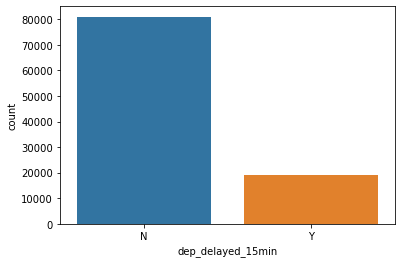

In [5]:
sns.countplot(x='dep_delayed_15min', data=fly)

In [6]:
fly_1 = pd.DataFrame((fly['dep_delayed_15min'] == 'Y'))
fly_1 = fly_1.astype(int)
b = fly_1.count()
a = fly_1['dep_delayed_15min'].sum()
alpha = a/b

In [7]:
alpha 

dep_delayed_15min    0.19044
dtype: float64

# найти зависимость количества задержек от длины пути, который предстоит пролететь самолету

In [8]:
fly_2 = pd.DataFrame(fly['Distance'])
fly_3 = pd.DataFrame(fly['dep_delayed_15min'])

In [9]:
fly_3

,dep_delayed_15min
0,N
1,N
2,N
3,N
4,Y
...,...
99995,N
99996,N
99997,N
99998,N


In [10]:
fly_4 = pd.concat([fly_2,fly_3],axis = 1)

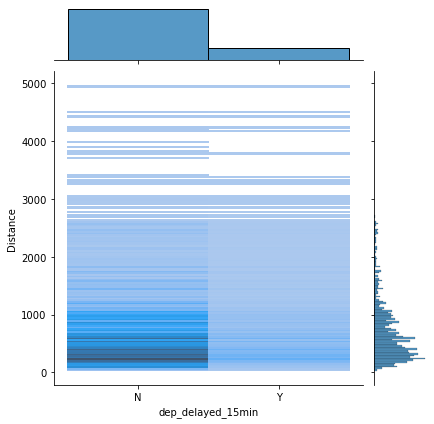

In [11]:
sns.jointplot(x='dep_delayed_15min', y='Distance', data=fly_4, kind="hist");

Задержки чаще всего на малых дистанциях

# топ 5 направлений, для которых чаще всего происходят задержки

In [17]:
fly_3 = pd.DataFrame((fly['dep_delayed_15min'] == 'Y'))
fly_3 = fly_3.astype(int)
fly_2 = pd.DataFrame(fly['Dest'])
fly_4 = pd.concat([fly_2,fly_3],axis = 1)

In [18]:
fly_4

,Dest,dep_delayed_15min
0,DFW,0
1,MCO,0
2,CLE,0
3,MEM,0
4,OMA,1
...,...,...
99995,RDD,0
99996,DAB,0
99997,IAH,0
99998,GGG,0


In [28]:
data = fly_4.groupby('Dest').sum()

In [35]:
data

,dep_delayed_15min
Dest,
ABE,17
ABI,8
ABQ,110
ABY,6
ACK,0
...,...
WRG,4
WYS,2
XNA,47


In [42]:
data = data.sort_values('dep_delayed_15min', ascending=False).head(5)

In [62]:
data

,dep_delayed_15min
Dest,
ATL,1281
ORD,1072
DFW,656
EWR,584
LAX,525


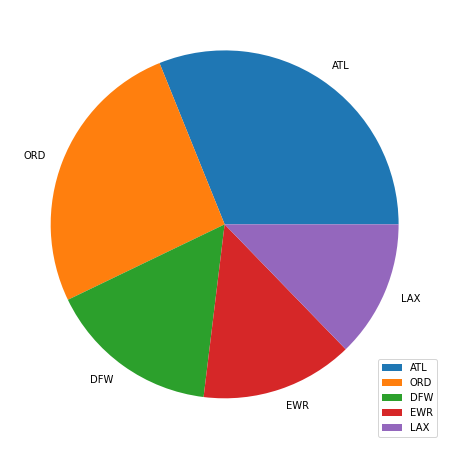

In [65]:
data.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.ylabel("")
plt.show()

# в какие времена года чаще всего происходят задержки рейсов

In [66]:
fly_3 = pd.DataFrame((fly['dep_delayed_15min'] == 'Y'))
fly_3 = fly_3.astype(int)
fly_2 = pd.DataFrame(fly['Month'])
fly_4 = pd.concat([fly_2,fly_3],axis = 1)

In [67]:
fly_4

,Month,dep_delayed_15min
0,c-8,0
1,c-4,0
2,c-9,0
3,c-11,0
4,c-10,1
...,...,...
99995,c-5,0
99996,c-1,0
99997,c-1,0
99998,c-4,0


In [85]:
data = fly_4.groupby('Month').sum()

In [86]:
data = data.sort_values('dep_delayed_15min', ascending=False)

In [88]:
data

,dep_delayed_15min
Month,
c-7,2073
c-12,1994
c-6,1867
c-8,1783
c-3,1676
c-1,1539
c-10,1501
c-11,1397
c-2,1316


Text(0, 0.5, '')

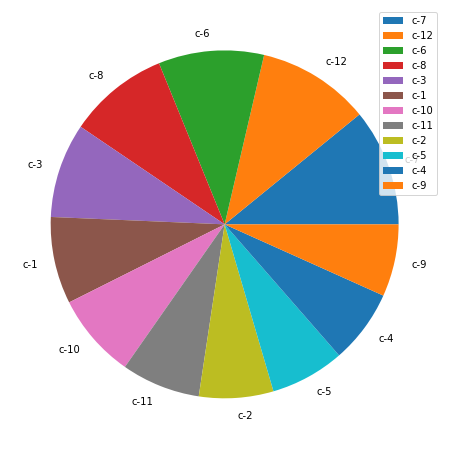

In [77]:
data.plot(kind='pie', subplots=True,  figsize=(8, 8))
plt.ylabel("")


# найти топ 10 самых хороших перевозчиков, которые реже всего задерживают свои рейсы

In [91]:
fly_3 = pd.DataFrame((fly['dep_delayed_15min'] == 'N'))
fly_3 = fly_3.astype(int)
fly_2 = pd.DataFrame(fly['UniqueCarrier'])
fly_4 = pd.concat([fly_2,fly_3],axis = 1)

In [92]:
fly_4

,UniqueCarrier,dep_delayed_15min
0,AA,1
1,US,1
2,XE,1
3,OO,1
4,WN,0
...,...,...
99995,OO,1
99996,CO,1
99997,NW,1
99998,MQ,1


In [93]:
data = fly_4.groupby('UniqueCarrier').sum()

In [94]:
data

,dep_delayed_15min
UniqueCarrier,
AA,7648
AQ,216
AS,1681
B6,1445
CO,3546
DH,810
DL,6755
EV,2848
F9,850


In [96]:
data = data.sort_values('dep_delayed_15min', ascending=False).head(10)

In [97]:
data

,dep_delayed_15min
UniqueCarrier,
WN,11863
AA,7648
DL,6755
OO,6113
MQ,5995
UA,5554
US,5397
NW,5328
XE,4875


Text(0, 0.5, '')

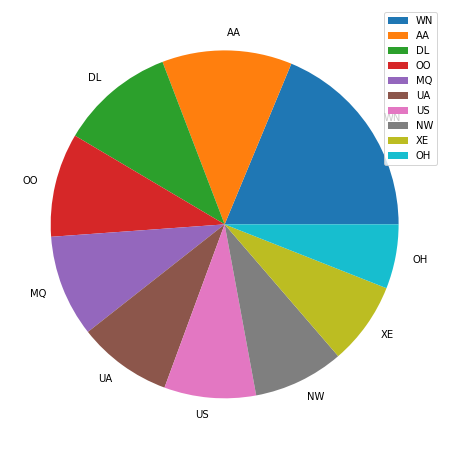

In [98]:
data.plot(kind='pie', subplots=True,  figsize=(8, 8))
plt.ylabel("")

# найти топ 10 самых безответственных аэропортов, в которых чаще всего происходят задержки

In [99]:
fly_3 = pd.DataFrame((fly['dep_delayed_15min'] == 'Y'))
fly_3 = fly_3.astype(int)
fly_2 = pd.DataFrame(fly['Origin'])
fly_4 = pd.concat([fly_2,fly_3],axis = 1)

In [101]:
fly_4

,Origin,dep_delayed_15min
0,ATL,0
1,PIT,0
2,RDU,0
3,DEN,0
4,MDW,1
...,...,...
99995,SFO,0
99996,EWR,0
99997,DTW,0
99998,DFW,0


In [102]:
data = fly_4.groupby('Origin').sum()

In [103]:
data = data.sort_values('dep_delayed_15min', ascending=False).head(10)

In [104]:
data

,dep_delayed_15min
Origin,
ATL,1506
ORD,1254
DFW,902
DEN,575
LAX,552
LAS,546
EWR,538
IAH,492
PHX,491


Text(0, 0.5, '')

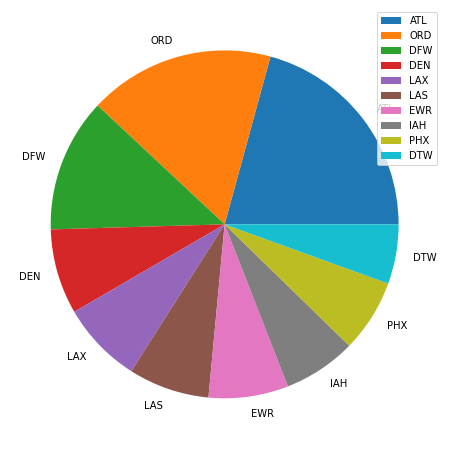

In [105]:
data.plot(kind='pie', subplots=True,  figsize=(8, 8))
plt.ylabel("")

# найти необычную зависимость количества задержек от имеющихся данных

от дня недели и числа 

In [106]:
fly_3 = pd.DataFrame((fly['dep_delayed_15min'] == 'Y'))
fly_3 = fly_3.astype(int)
fly_2 = pd.DataFrame(fly['DayofMonth'])
fly_4 = pd.concat([fly_2,fly_3],axis = 1)

In [107]:
fly_5 = pd.DataFrame((fly['dep_delayed_15min'] == 'Y'))
fly_5 = fly_3.astype(int)
fly_6 = pd.DataFrame(fly['DayOfWeek'])
fly_7 = pd.concat([fly_6,fly_5],axis = 1)

In [108]:
fly_4

,DayofMonth,dep_delayed_15min
0,c-21,0
1,c-20,0
2,c-2,0
3,c-25,0
4,c-7,1
...,...,...
99995,c-4,0
99996,c-18,0
99997,c-24,0
99998,c-27,0


In [109]:
fly_7

,DayOfWeek,dep_delayed_15min
0,c-7,0
1,c-3,0
2,c-5,0
3,c-6,0
4,c-6,1
...,...,...
99995,c-3,0
99996,c-3,0
99997,c-2,0
99998,c-4,0


In [110]:
data = fly_4.groupby('DayofMonth').sum()
data_7 = fly_7.groupby('DayOfWeek').sum()

In [114]:
data = data.sort_values('dep_delayed_15min', ascending=False).head(7)
data_7 = data_7.sort_values('dep_delayed_15min', ascending=False)

In [115]:
data

,dep_delayed_15min
DayofMonth,
c-22,806
c-28,723
c-20,715
c-23,707
c-27,694
c-16,684
c-21,666


In [113]:
data_7

,dep_delayed_15min
DayOfWeek,
c-5,3285
c-4,3117
c-1,2774
c-7,2705
c-3,2567
c-2,2451
c-6,2145


Чаще всего в пятницу 22-ых числах месяца (из прошлых пунктов июль)